# <center>**Pré-Processamento**</center>

A ideia principal desta etapa é realizar um tratamento da base de dados fornecida no link: https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019.

O resultado deste arquivo será uma tabela otimizada e pronta para análise exploratória dos dados. As correções feitas incluem a estimativa de variáveis com muitos dados ausentes, a remoção de linhas repetidas e a formatação adequada das colunas que necessitam.

### **Bibliotecas e Configurações Gerais**

Todas as bibliotecas utilizadas no projeto e os ajustes gerais de configuração.

In [1]:
# Importando Bibliotecas
# Manipulação de dados
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Código para visualizar os gráficos ao exportar o arquivo para html
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

Para facilitar a visualização das colunas dos dataframes, será altarado as configurações de display conforme o código abaixo.

In [3]:
# Configuração de visualização
# Definindo o valor máximo de colunas a serem exibidas como None
pd.set_option("display.max_columns", None)

### **Importando Base de dados**

Realizando a importação da base de dados baixada do kaggle para o pandas e obtendo as principais informações.

O dataframe original sem nenhuma alteração será chamado de df_orginal.

In [4]:
# Lendo arquivo csv
df_original = pd.read_csv("../data/sao-paulo-properties-april-2019.csv")

df_original

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [5]:
# Principais informações
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Inicialmente, a base de dados parece estar completa, sem valores ausentes, e com os formatos de dados das colunas adequadamente configurados.

### **Tratamentos**

Para não interfirir no dataframe original, será criado um dataframe auxiliar chamado de df_main.

In [6]:
# Criando cópia do dataframe original
df_main = df_original.copy()

df_main

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


#### **Linhas Duplicadas**

O primeiro tratamento será com relação as linhas duplicadas.

In [7]:
# Verificando linhas duplicadas
df_main[df_main.duplicated(keep=False)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
12,900,130,56,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.552073,-46.483411
163,1300,387,50,2,2,1,1,0,0,0,0,Cidade Tiradentes/São Paulo,rent,apartment,-23.582576,-46.417478
165,1300,387,50,2,2,1,1,0,0,0,0,Cidade Tiradentes/São Paulo,rent,apartment,-23.582576,-46.417478
201,999,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
202,888,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,233750,100,47,2,2,1,1,1,0,0,0,Vila Jacuí/São Paulo,sale,apartment,-23.501856,-46.456386
13476,660000,450,107,3,2,1,2,0,0,0,0,Cidade Ademar/São Paulo,sale,apartment,-23.660596,-46.667492
13492,690000,450,107,3,2,1,2,0,0,0,0,Cidade Ademar/São Paulo,sale,apartment,-23.660596,-46.667492
13496,660000,450,107,3,2,1,2,0,0,0,0,Cidade Ademar/São Paulo,sale,apartment,-23.660596,-46.667492


Observamos que há 559 entradas duplicadas no dataframe. Considerando que estamos avaliando imóveis, linhas repetidas não fazem sentido e podem comprometer a modelagem. Por isso, removeremos essas entradas duplicadas.

In [8]:
# Removendo linhas duplicadas
df_main = df_main.drop_duplicates()

In [9]:
# Visualizando resultados
df_main[df_main.duplicated(keep=False)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude


#### Coluna ***Property Type***

A coluna "property type" indica o tipo de imóvel. No entanto, ela apresenta apenas o valor "apartment", indicando que a base de dados inteira lista exclusivamente apartamentos. Como ela não traz diversidade de informações, optaremos por removê-la da análise.

In [10]:
# Visualizando valores da coluna
df_main["Property Type"].value_counts()

Property Type
apartment    13321
Name: count, dtype: int64

In [11]:
# Removendo coluna do dataframe
df_main = df_main.drop(columns=["Property Type"])

#### Coluna ***Latitude e Longitude***

A primeira correção nas colunas de latitude e longitude refere-se aos valores nulos. Valores de latitude e longitude zerados indicam locais no Oceano Atlântico, o que é incoerente, já que estamos análisando apartamentos apenas em São Paulo.

In [12]:
# Plotando pontos no mapa
df_main[(df_main["Latitude"] == 0) | (df_main["Longitude"] == 0)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda/São Paulo,rent,0.0,0.0
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda/São Paulo,rent,0.0,0.0
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda/São Paulo,rent,0.0,0.0
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda/São Paulo,rent,0.0,0.0
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda/São Paulo,rent,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi/São Paulo,sale,0.0,0.0
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara/São Paulo,sale,0.0,0.0
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,0.0,0.0
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara/São Paulo,sale,0.0,0.0


In [13]:
# Obtendo o index das linhas que necessitam de tratamento
lat_lon_zero_index = df_main[(df_main["Latitude"] == 0) | (df_main["Longitude"] == 0)].index.to_list()

Para preservar os dados dessas 865 entradas, utilizaremos a coluna "distritos" como referência, que representa outra informação de localização disponível. Assim, atribuiremos a essas linhas os valores medianos de latitude e longitude com base no respectivo bairro.

In [14]:
# Criando dataframe com a mediana de Latitude e Longitude por Bairro
df_districts_median = df_main[["District", "Latitude", "Longitude"]].groupby("District").median()
df_districts_median

,Latitude,Longitude
District,,
Alto de Pinheiros/São Paulo,-23.543300,-46.715186
Anhanguera/São Paulo,-23.660558,-46.684751
Aricanduva/São Paulo,-23.538054,-46.522015
Artur Alvim/São Paulo,-23.539632,-46.480033
Barra Funda/São Paulo,-23.523164,-46.657965
...,...,...
Vila Matilde/São Paulo,-23.535553,-46.524037
Vila Olimpia/São Paulo,-23.596742,-46.681889
Vila Prudente/São Paulo,-23.588625,-46.577985


In [15]:
# Substituindo valores zerados
# Latitude
df_main["Latitude"] = df_main.apply(lambda row: df_districts_median.loc[df_districts_median.index == row["District"], "Latitude"][0] if row["Latitude"] == 0 else row["Latitude"], axis=1)
# Longitude
df_main["Longitude"] = df_main.apply(lambda row: df_districts_median.loc[df_districts_median.index == row["District"], "Longitude"][0] if row["Longitude"] == 0 else row["Longitude"], axis=1)

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_7632\916344877.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_7632\916344877.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [16]:
# Visualizando mudanças
df_main[df_main.index.isin(lat_lon_zero_index)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda/São Paulo,rent,-23.523164,-46.657965
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda/São Paulo,rent,-23.523164,-46.657965
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda/São Paulo,rent,-23.523164,-46.657965
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda/São Paulo,rent,-23.523164,-46.657965
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda/São Paulo,rent,-23.523164,-46.657965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi/São Paulo,sale,-23.583597,-46.675920
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara/São Paulo,sale,-23.648640,-46.643198
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,-23.648640,-46.643198
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara/São Paulo,sale,-23.648640,-46.643198


In [17]:
# Observando latitude e longitude medianas do bairro Barra Funda/São Paulo
df_districts_median[df_districts_median.index == "Barra Funda/São Paulo"]

,Latitude,Longitude
District,,
Barra Funda/São Paulo,-23.523164,-46.657965


In [18]:
# Verificando se temos valores zerados
df_main[(df_main["Latitude"] == 0) | (df_main["Longitude"] == 0)]


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude


Podemos notar que os valores nulos de latitude e longitude foram corretamente estimados com base na mediana dos respectivos bairros.

In [19]:
# Criando o gráfico de dispersão no mapa
fig = px.scatter_mapbox(df_main, 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=2.3, 
                        height=600,
                        mapbox_style="carto-positron")

fig.show()

Como podemos ver, existem diversos pontos que estão fora do Brasil. Para observar melhor estes pontos, iremos considerar os limites geográficos do país de acordo com as coordenadas que delimitam a cidade de São Paulo:

- Latitude Minima = -24.0
- Latitude Maxima = -23.3
- Longitude Minima = -47.2 
- Longitude Maxima = -46.3

In [20]:
# Definindo limites
lat_min, lat_max = -24.0, -23.3
lon_min, lon_max = -47.2, -46.3

# Filtrando pontos
outside_sp_df = df_main[~((df_main['Latitude'] >= lat_min) & 
                     (df_main['Latitude'] <= lat_max) & 
                     (df_main['Longitude'] >= lon_min) & 
                     (df_main['Longitude'] <= lon_max))]


# Plotando pontos selecionados
# Criando o gráfico de dispersão no mapa
fig = px.scatter_mapbox(outside_sp_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=2, 
                        height=600,
                        mapbox_style="carto-positron",
                        color_discrete_sequence=["red"])

fig.show()

Como podemos observar, muitos pontos estão fora de São Paulo.

In [21]:
# Visualizando dataframe
outside_sp_df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1113,1300,637,50,2,2,1,1,1,0,0,0,Jabaquara/São Paulo,rent,-46.648904,-23.652027
1211,2200,500,30,1,2,1,1,1,0,1,0,Moema/São Paulo,rent,-46.655399,-23.607013
1583,2600,974,76,2,2,1,2,1,1,1,0,Alto de Pinheiros/São Paulo,rent,-46.715115,-23.540783
1792,1400,580,60,3,2,1,1,1,0,1,0,Jaguaré/São Paulo,rent,-46.749039,-23.545329
1937,4200,800,97,2,3,1,2,1,1,1,0,Perdizes/São Paulo,rent,-46.678478,-23.534683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13299,303000,350,53,3,2,1,1,0,0,1,0,Vila Prudente/São Paulo,sale,-26.922571,-49.060645
13461,189000,100,50,2,1,0,1,0,0,0,0,Capão Redondo/São Paulo,sale,-22.460514,-49.337815
13522,275000,220,63,2,1,0,1,0,0,0,0,Cidade Dutra/São Paulo,sale,-26.922512,-49.060707
13525,296800,245,62,3,1,0,1,0,0,0,0,Cidade Dutra/São Paulo,sale,-26.922512,-49.060707


Ao examinar os pontos situados fora da cidade de São Paulo, identificamos que vários podem ter os valores de latitude e longitude trocados, conforme ilustrado no mapa a seguir.

In [22]:
# Pontos com Latitude e Longitude possivelmente invertidos
outside_sp_df[(outside_sp_df["Latitude"] < -40) & (outside_sp_df["Longitude"] < -20)].head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1113,1300,637,50,2,2,1,1,1,0,0,0,Jabaquara/São Paulo,rent,-46.648904,-23.652027
1211,2200,500,30,1,2,1,1,1,0,1,0,Moema/São Paulo,rent,-46.655399,-23.607013
1583,2600,974,76,2,2,1,2,1,1,1,0,Alto de Pinheiros/São Paulo,rent,-46.715115,-23.540783
1792,1400,580,60,3,2,1,1,1,0,1,0,Jaguaré/São Paulo,rent,-46.749039,-23.545329
1937,4200,800,97,2,3,1,2,1,1,1,0,Perdizes/São Paulo,rent,-46.678478,-23.534683


In [23]:
# Observando os pontos com latitude e longitude invertidos
fig = px.scatter_mapbox(outside_sp_df[(outside_sp_df["Latitude"] < -40) & (outside_sp_df["Longitude"] < -20)], 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=2, 
                        height=600,
                        mapbox_style="carto-positron",
                        color_discrete_sequence=["purple"])

fig.show()

Os pontos cujas latitudes e longitudes estão invertidas indicam o oceano. O código a seguir troca essas coordenadas para verificar se elas correspondem corretamente a São Paulo.

In [24]:
# Visualizando no mapa com a correção
# Criando o gráfico de dispersão no mapa
fig = px.scatter_mapbox(outside_sp_df[(outside_sp_df["Latitude"] < -40) & (outside_sp_df["Longitude"] < -20)], 
                        lat="Longitude", 
                        lon="Latitude", 
                        zoom=2, 
                        height=600,
                        mapbox_style="carto-positron",
                        color_discrete_sequence=["purple"])

fig.show()

Percebe-se que ao alterar estes pontos eles voltam para a cidade de São Paulo.

In [25]:
# Alterando pontos no dataframe df_main
# Obtendo os index
inverted_values_index = outside_sp_df[(outside_sp_df["Latitude"] < -40) & (outside_sp_df["Longitude"] < -20)].index.to_list()

# Alterando no df_main 
df_main.loc[df_main.index.isin(inverted_values_index), ["Latitude", "Longitude"]] = df_main.loc[df_main.index.isin(inverted_values_index), ["Longitude", "Latitude"]].values

# Visualizando os pontos que ainda estão errados
outside_sp_df = outside_sp_df.drop(inverted_values_index)

# Criando o gráfico de dispersão no mapa
fig = px.scatter_mapbox(outside_sp_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=2, 
                        height=600,
                        mapbox_style="carto-positron",
                        color_discrete_sequence=["red"])

fig.show()

Os apartamentos que tinham coordenadas de latitude e longitude indicando o oceano já foram ajustados. No entanto, ainda existem alguns pontos que não estão corretamente localizados em São Paulo. Como dispomos das informações sobre os distritos onde esses pontos deveriam estar, faremos as correções com base nas medianas de latitude e longitude de cada distrito.

In [26]:
# Criando lista com o index dos apartamentos que necessitam de tratamento
apt_correction_index = outside_sp_df.index.to_list()

In [27]:
# Alterando no df_main
# Realizando alterações no outside_sp_df para testar
# Para Latitude
df_main.loc[df_main.index.isin(apt_correction_index), "Latitude"] = outside_sp_df["District"].map(df_districts_median["Latitude"])
# Para Longitude
df_main.loc[df_main.index.isin(apt_correction_index), "Longitude"] = outside_sp_df["District"].map(df_districts_median["Longitude"])

# Visualizando as mudanças
# Criando o gráfico de dispersão no mapa
fig = px.scatter_mapbox(df_main, 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=2, 
                        height=600,
                        mapbox_style="carto-positron",
                        color_discrete_sequence=["blue"])

fig.show()

Com isso temos todos os apartamentos com os valores de latitude e longitude corrigidos.

#### Coluna ***Negociation Type***

Esta coluna especifica se o apartamento está à venda ou para aluguel. Dado o grande contraste nos valores, com apartamentos à venda geralmente sendo muito mais caros do que aqueles para alugar, vamos tratar estas análises separadamente. Faremos um modelo para os apartamentos à venda e outro para os disponíveis para aluguel.

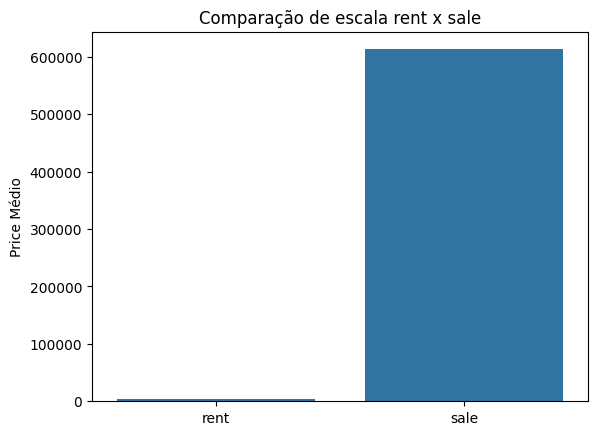

In [28]:
# Observando diferença pela média
labels = df_main["Negotiation Type"].drop_duplicates().to_list()
values = [df_main.loc[df_main["Negotiation Type"] == labels[0], "Price"].mean(), 
          df_main.loc[df_main["Negotiation Type"] == labels[1], "Price"].mean()
          ]

sns.barplot(x=labels , y=values)
plt.title("Comparação de escala rent x sale")
plt.ylabel("Price Médio")

plt.show()

De fato existe uma grande disparidade de escala de preço entre apartamentos para alugar e vender. Por conta disso, serão criados dois dataframes separados, um para a os imóveis a venda e outro para os imóveis para alugar.

In [29]:
# Criando dataframe de apartamentos para alugar
df_main_rent = df_main[df_main["Negotiation Type"] == "rent"]

# Criando dataframe de apartamentos a venda
df_main_sale = df_main[df_main["Negotiation Type"] == "sale"]

Como os dataframes foram separados pela coluna Negotiation Type, podemos retira-la destas novas tabelas.

In [30]:
# Retirando coluna Negotiation Type
# Rent
df_main_rent = df_main_rent.drop(columns=["Negotiation Type"])
# Sale
df_main_sale = df_main_sale.drop(columns=["Negotiation Type"])

#### Coluna ***Price e Condo***

O propósito principal do algoritmo é conduzir uma análise de predição de preços, tanto para aluguel quanto para venda. Assim, não é lógico ter registros com o valor 'price' igual a zero. Além disso, uma vez que nossa base de dados contém apenas apartamentos, também não é coerente encontrar valores de condomínio zerados.

In [31]:
# Apartamentos com Price Zerados
df_main[df_main['Price'] == 0]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude


Como o código acima demonstra, não temos valores da coluna "Price" zerados.

In [32]:
# Apartamentos com Condo zerados
df_main[df_main["Condo"] == 0]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
5,1170,0,50,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.548751,-46.477195
8,1000,0,65,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.548751,-46.477195
9,1000,0,100,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.548751,-46.477195
49,1200,0,48,2,2,1,1,0,0,0,0,Cangaíba/São Paulo,rent,-23.502336,-46.523243
50,1450,0,65,2,2,1,1,1,0,0,0,Cangaíba/São Paulo,rent,-23.506197,-46.522358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,400000,0,60,2,1,0,1,0,0,0,0,Cursino/São Paulo,sale,-23.627452,-46.619960
13563,330000,0,49,2,1,0,1,0,0,0,0,Cursino/São Paulo,sale,-23.615080,-46.605059
13575,909717,0,85,3,2,1,2,0,0,1,0,Ipiranga/São Paulo,sale,-23.575564,-46.606447
13603,559000,0,90,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,-23.505391,-46.622783


In [33]:
# Discrimininando por aluguel e venda
df_main.loc[df_main["Condo"] == 0, "Negotiation Type"].value_counts()

Negotiation Type
sale    1289
rent     618
Name: count, dtype: int64

In [34]:
# Porcentagem de valores zerados
print("Porcentagem de valores zerados:")
print(round((df_main[df_main["Condo"] == 0].shape[0] / df_main.shape[0]) * 100, 2))

Porcentagem de valores zerados:
14.32


Existem 14% de linhas de apartamentos com o preço de condominio zerado, no qual 1289 estão a venda e 618 para alugar. Primeiramente iremos explorar se o tamanho e o preço de venda do apartamento afeta no preço do condominio.

Para isso, será plotado um gráfico de duas dimenções, no eixo x estara o tamanho do apartamento e no eixo y o preço do condominio.

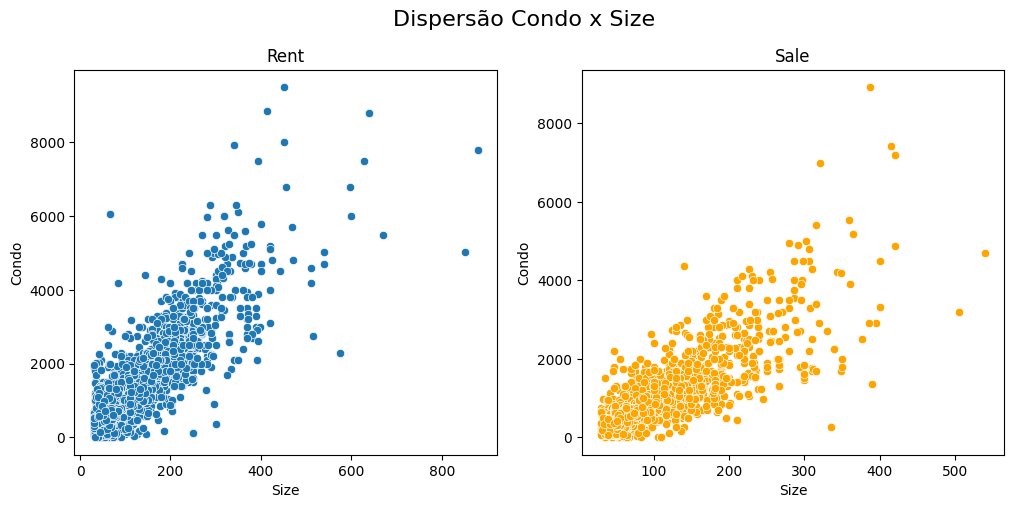

In [35]:
# Plotando gráficos de dispersão
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando para rent
sns.scatterplot(x="Size", y="Condo", data=df_main_rent[df_main_rent["Condo"] != 0], ax=axs[0])
axs[0].set_title("Rent")

# Plotando para sale
sns.scatterplot(x="Size", y="Condo", data=df_main_sale[df_main_sale["Condo"] != 0], ax=axs[1], color="orange")
axs[1].set_title("Sale")

# Adicionando um titulo geral
fig.suptitle('Dispersão Condo x Size', fontsize=16, y=1)

plt.show()

A principio parace haver uma relação crescente entre o tamanho do apartamento e o preço do condominio, iremos analisar se existe uma relação do condominio com o preço anunciado de venda ou aluguel.

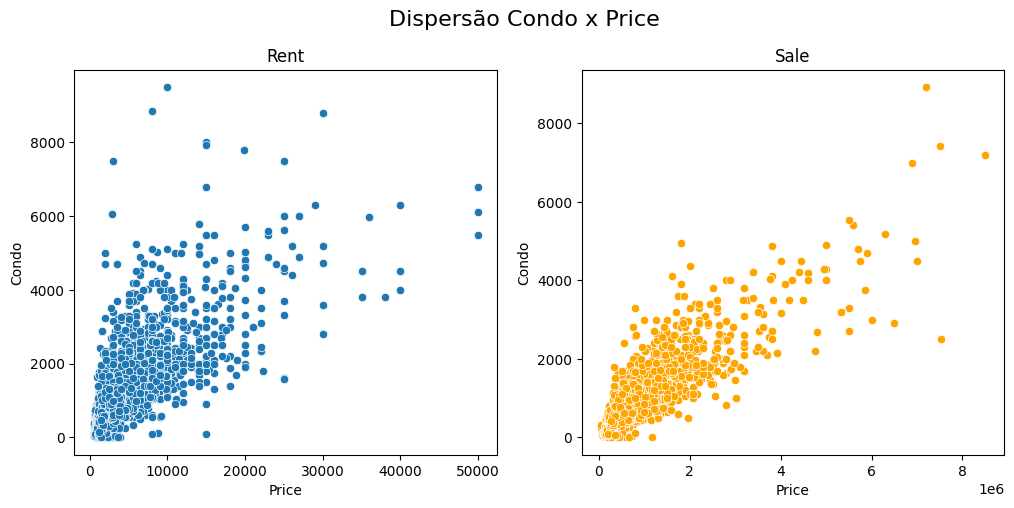

In [36]:
# Plotando gráficos de dispersão
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando para rent
sns.scatterplot(x="Price", y="Condo", data=df_main_rent[df_main_rent["Condo"] != 0], ax=axs[0])
axs[0].set_title("Rent")

# Plotando para sale
sns.scatterplot(x="Price", y="Condo", data=df_main_sale[df_main_sale["Condo"] != 0], ax=axs[1], color="orange")
axs[1].set_title("Sale")

# Adicionando um titulo geral
fig.suptitle('Dispersão Condo x Price', fontsize=16, y=1)

plt.show()

Assim como observado com o tamanho, parece haver uma relação linear crescente entre o valor do condomínio e o preço anunciado do imóvel. Devido a essa forte correlação, utilizaremos essas duas variáveis para estimar o valor de condomínio dos apartamentos que foram registrados como zero.

A tecnica para estimar estes valores será a regressão linear. O objetivo é obter duas equações que estimam o preço de condominio, uma para os imóveis a venda e outra para os imóveis de aluguel.

In [37]:
# Criando dataframe exclusivo para regressão
df_condo_reg_rent = df_main_rent[["Price", "Condo", "Size"]].copy()
df_condo_reg_sale = df_main_sale[["Price", "Condo", "Size"]].copy()

Para realizar a modelagem das regressões, será retirados os valores zerados, que serão depois estimados com base nessa regressão.

In [38]:
# Retirando os valores zerados
df_condo_reg_rent = df_condo_reg_rent[df_condo_reg_rent["Condo"] != 0]
df_condo_reg_sale = df_condo_reg_sale[df_condo_reg_sale["Condo"] != 0]

Assim, podemos realizar a modelagem de regressão.

In [39]:
# Separando conjuntos de teste e treinamento

# Rent
X_rent = df_condo_reg_rent[["Price", "Size"]]
y_rent = df_condo_reg_rent["Condo"]

X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(X_rent, y_rent, test_size=0.2, random_state=42)

# Sale
X_sale = df_condo_reg_sale[["Price", "Size"]]
y_sale = df_condo_reg_sale["Condo"]

X_train_sale, X_test_sale, y_train_sale, y_test_sale = train_test_split(X_sale, y_sale, test_size=0.2, random_state=42)

In [40]:
# Treinando o modelo para Aluguel
# Rent
model_rent = LinearRegression()
model_rent.fit(X_train_rent, y_train_rent)

# Avaliando o Desempenho
y_pred_rent = model_rent.predict(X_test_rent)
mse_rent = mean_squared_error(y_test_rent, y_pred_rent)
r2_score_rent =r2_score(y_test_rent, y_pred_rent)
print(f"Erro quadrático médio (MSE) para o modelo de regressão para rent: {mse_rent:.2f}")
print(f"Coeficiente de determinação (R^2) para o modelo de regressão para rent: {r2_score_rent:.2f}")

Erro quadrático médio (MSE) para o modelo de regressão para rent: 143672.28
Coeficiente de determinação (R^2) para o modelo de regressão para rent: 0.80


In [41]:
# Treinando o modelo para Venda
# Rent
model_sale = LinearRegression()
model_sale.fit(X_train_sale, y_train_sale)

# Avaliando o Desempenho
y_pred_sale = model_sale.predict(X_test_sale)
mse_sale = mean_squared_error(y_test_sale, y_pred_sale)
r2_score_sale =r2_score(y_test_sale, y_pred_sale)
print(f"Erro quadrático médio (MSE) para o modelo de regressão para sale: {mse_sale:.2f}")
print(f"Coeficiente de determinação (R^2) para o modelo de regressão para sale: {r2_score_sale:.2f}")

Erro quadrático médio (MSE) para o modelo de regressão para sale: 93117.43
Coeficiente de determinação (R^2) para o modelo de regressão para sale: 0.72


A principio temos resultados satisfatórios para a regressão utilizada para estimar os valores faltantes. 

Para obter um entendimento maior sobre a regressão realizada, iremos analisar os coeficientes $\beta$ gerados para cada um dos casos.

In [42]:
# Coeficientes para o modelo de Rent
betas_rent = model_rent.coef_
intercept_rent = model_rent.intercept_
# Printando os coeficientes
print(f"beta price: {betas_rent[0]}")
print(f"beta size: {betas_rent[1]}")
print(f"Intercepto beta zero: {intercept_rent}")

beta price: 0.060489168026343354
beta size: 8.792268271379994
Intercepto beta zero: -81.29407457579555


In [43]:
# Coeficientes para o modelo de Sale
betas_sale = model_sale.coef_
intercept_sale = model_sale.intercept_
# Printando os coeficientes
print(f"beta price: {betas_sale[0]}")
print(f"beta size: {betas_sale[1]}")
print(f"Intercepto beta zero: {intercept_sale}")

beta price: 0.0005772555330589681
beta size: 4.322190509215531
Intercepto beta zero: -9.958196244476653


Em ambos os cenários, o tamanho do imóvel influencia significativamente mais no valor do condomínio do que o preço listado para aluguel ou venda. Isso é evidenciado pelos coeficientes, onde os valores associados à venda são consideravelmente menores do que os relacionados ao tamanho do imóvel.

Para os apartamentos disponíveis para aluguel, um incremento de 1 unidade em sua dimensão resulta em um acréscimo aproximado de 9 no preço estipulado para aluguel. Já no caso dos apartamentos à venda, o mesmo aumento de 1 unidade na dimensão leva a um acréscimo de aproximadamente 4 no preço de venda proposto.

Com isso, temos as seguintes equações que serão utilizadas para estimar os preços de condominio igual a zero:

$$condo-rent = -81.29 + 0.06*Price + 8.79*Size$$


$$condo-sale = -9.96 + 0.006*Price + 4.32*Size$$

Para verificar se estes valores estão dentro da normalidade dos dados reais, iremos comparar os histogramas de antes e depois destas estipulações.

In [44]:
# Obtendo index de valores diferentes de zero
condo_zero_index_rent = df_main_rent[df_main_rent["Condo"] != 0].index.to_list()
condo_zero_index_sale = df_main_sale[df_main_sale["Condo"] != 0].index.to_list()

In [45]:
# Estimando os valores igual a zero

# Rent
df_main_rent.loc[df_main_rent["Condo"] == 0, "Condo"] = intercept_rent + betas_rent[0]*df_main_rent["Price"] + betas_rent[1]*df_main_rent["Size"]

# Sale
df_main_sale.loc[df_main_sale["Condo"] == 0, "Condo"] = intercept_sale + betas_sale[0]*df_main_sale["Price"] + betas_sale[1]*df_main_sale["Size"]

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_7632\2452594325.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 429.09166558  550.69253109  858.42192059  413.32180408  577.9126567
  318.7879907   445.46641877  430.90634062  486.96551559  457.56425237
  401.78618434  437.51747129  512.78010654  983.76253185  568.8392815
  553.99809642  224.81639118  388.56392301  612.80062286  430.94549089
  594.65387245  395.17505367  383.07722007 1618.06571083  444.9042049
  386.10167847  383.07722007  403.68621501  386.10167847  410.94491518
  383.07722007  321.8124491   419.37072088  448.49087717  439.97971583
  419.37072088  418.80850702  547.94917962  544.64361429  554.56031029
  462.76984838  475.42989585  459.70271216  384.2016478   436.95525743
  472.68654438  594.59338328  587.87908563 1466.97822648 1120.77419856
 1422.52238912 3149.6542785  1644.78110493 1139.05638468 1463.31360085
 6535.69333083  377.59051

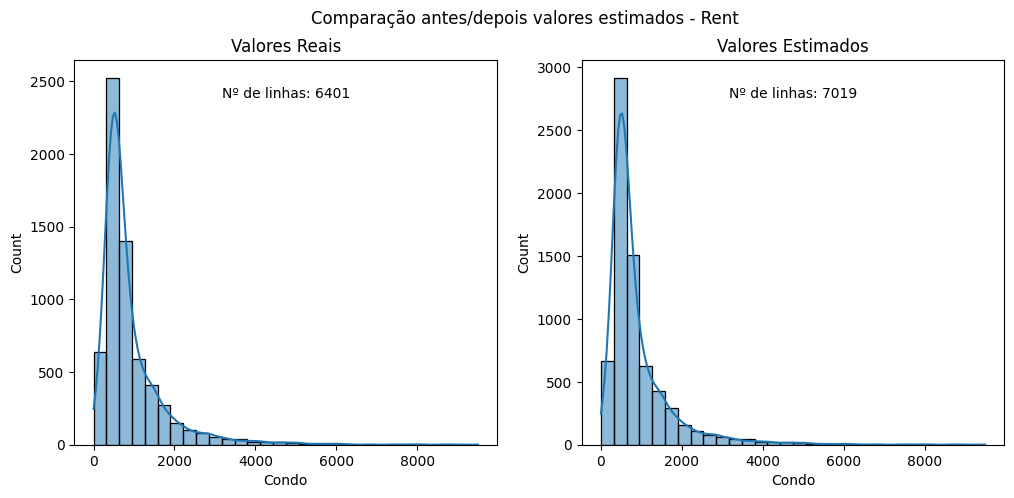

In [46]:
# Comparação de histograma
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando Histograma para os valores Reais 
sns.histplot(x=df_main_rent.loc[df_main_rent.index.isin(condo_zero_index_rent), "Condo"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Valores Reais")
axs[0].text(0.5, 0.9, f'Nº de linhas: {df_main_rent.loc[df_main_rent.index.isin(condo_zero_index_rent), "Condo"].shape[0]}', transform=axs[0].transAxes, ha="center")


# Plotando Histograma para os valores estimados
sns.histplot(x=df_main_rent["Condo"], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Valores Estimados")
axs[1].text(0.5, 0.9, f'Nº de linhas: {df_main_rent["Condo"].shape[0]}', transform=axs[1].transAxes, ha="center")

# Titulo geral
fig.suptitle("Comparação antes/depois valores estimados - Rent")

plt.show()

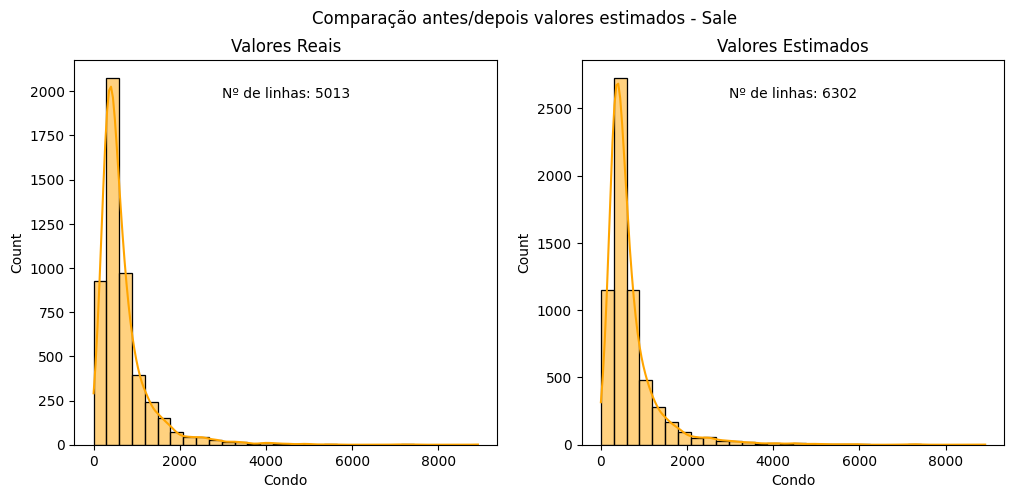

In [47]:
# Comparação de histograma
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando Histograma para os valores Reais 
sns.histplot(x=df_main_sale.loc[df_main_sale.index.isin(condo_zero_index_sale), "Condo"], bins=30, kde=True, ax=axs[0], color="orange")
axs[0].set_title("Valores Reais")
axs[0].text(0.5, 0.9, f'Nº de linhas: {df_main_sale.loc[df_main_sale.index.isin(condo_zero_index_sale), "Condo"].shape[0]}', transform=axs[0].transAxes, ha="center")


# Plotando Histograma para os valores estimados
sns.histplot(x=df_main_sale["Condo"], bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Valores Estimados")
axs[1].text(0.5, 0.9, f'Nº de linhas: {df_main_sale["Condo"].shape[0]}', transform=axs[1].transAxes, ha="center")

# Titulo geral
fig.suptitle("Comparação antes/depois valores estimados - Sale")

plt.show()

Analisando os histograma, percebemos que o método de estimação dos valores zerados de condominio através da regressão linear, não alterou a natureza da distribuição, o que é um resultado positivo.

Para avaliar a eficácia da imputação desses valores, conduziremos uma análise usando métricas descritivas, como média, mediana, moda e desvio padrão. Essa comparação será feita considerando os dados antes e após a imputação através da regressão.

In [48]:
# Visualizando métricas de descritivas
describe_rent_real = df_main_rent.loc[df_main_rent.index.isin(condo_zero_index_rent), "Condo"].describe().to_frame(name="Valores Reais")
describe_rent_estimade = df_main_rent["Condo"].describe().to_frame(name="Valores Estimados")

comparison_rent = pd.concat([describe_rent_real, describe_rent_estimade], axis=1)

print("Para os imóveis Rent")
comparison_rent

Para os imóveis Rent


,Valores Reais,Valores Estimados
count,6401.000000,7019.000000
mean,912.251055,894.526245
std,838.586641,824.102591
min,1.000000,1.000000
25%,450.000000,446.000000
50%,641.000000,618.000000
75%,1060.000000,1020.000000
max,9500.000000,9500.000000


In [49]:
# Visualizando métricas de descritivas Sale
describe_sale_real = df_main_sale.loc[df_main_sale.index.isin(condo_zero_index_sale), "Condo"].describe().to_frame(name="Valores Reais")
describe_sale_estimade = df_main_sale["Condo"].describe().to_frame(name="Valores Estimados")

comparison_sale = pd.concat([describe_sale_real, describe_sale_estimade], axis=1)

print("Para os imóveis Sale")
comparison_sale

Para os imóveis Sale


,Valores Reais,Valores Estimados
count,5013.000000,6302.000000
mean,681.833832,684.798007
std,631.830161,666.144571
min,1.000000,1.000000
25%,345.000000,339.000000
50%,500.000000,490.000000
75%,800.000000,778.750000
max,8920.000000,8920.000000


Como podemos observar, não ocorreu nenhuma mudança siginificativa nos dados após a imputação dos valores faltantes utilizando a regressão linear.

Contudo, é importante destacar algumas particularidades dessa abordagem. Em primeiro lugar, não estamos levando em conta todos os fatores que podem influenciar o preço do condomínio. Por exemplo, as colunas "Swimming Pool" e "Elevator" podem impactar o valor devido aos custos de manutenção. Além disso, a localização é outro elemento que pode influenciar. No entanto, o propósito desta regressão é estimar de forma mais acurada o preço do condomínio para os 14% dos apartamentos que apresentam esse valor como zero. O principal objetivo é evitar a perda de informações de outras variáveis preditivas devido à ausência deste dado. Dada essa perspectiva, é essencial uma análise mais cuidadosa na interpretação dos modelos, especialmente se essa variável tiver grande influência no desempenho preditivo.

### **Conclusão**

Após todas estas etapas de tratamento, obtemos dois dataframes destinados à análise exploratória e posteriormente à modelagem preditiva: `df_main_rent` e `df_main_sale`. O primeiro diz respeito aos apartamentos cuja coluna 'price' indica o valor do aluguel, enquanto o segundo refere-se ao valor de venda. A seguir, apresentamos um resumo de todos os procedimentos executados para a elaboração destes dataframes:

- Exclusão de linhas duplicadas, mantendo apenas uma observação.
- Remoção da coluna Property Type, que possuía um único valor categórico.
- Correção de valores de Latitude e Longitude.
- Separação em dois dataframes distintos, um para venda e outro para aluguel.
- Imputação de valores de condomínio iguais a zero, utilizando uma regressão linear.

E com isso, temos os dois dataframes finais abaixo.

In [50]:
# df_main_rent
df_main_rent.to_csv("../data/df_main_rent.csv")

# df_main_sale
df_main_sale.to_csv("../data/df_main_sale.csv")